<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Projeto_modulo_2/Projeto_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

# Tema

# Carregamento de bibliotecas, importação dos dados e definição de funções

Bibliotecas

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.patches as mpatches
import seaborn as sns

Leitura das tabelas

In [2]:
cob_im_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/cobertura_imuno_ano.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",")
cob_im_ano.drop(" Total", axis = 1, inplace = True)

tub_evo_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tuberculose_evo_ano.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                              skipfooter = 18, engine = "python")
tub_evo_ano.drop("Total", axis = 1, inplace = True)
tub_evo_ano = tub_evo_ano.rename(columns = {"Situação Encerra.":"Evolução"})
tub_evo_ano.iloc[:,1:] = tub_evo_ano.iloc[:,1:].replace(r"-", "0").astype(int)

tub_evo_eta = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tuberculose_evo_etaria.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 18, engine = "python")
tub_evo_eta.drop(["Em branco/IGN","Total"], axis = 1, inplace = True)
tub_evo_eta = tub_evo_eta.rename(columns = {"Situação Encerra.":"Evolução"})
tub_evo_eta.iloc[:,1:] = tub_evo_eta.iloc[:,1:].replace(r"-", "0").astype(int)

coq_evo_ano1 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/coqueluche_evo_ano_1.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 12, engine = "python")
coq_evo_ano1.drop("Total", axis = 1, inplace = True)
coq_evo_ano1 = coq_evo_ano1.rename(columns = {"Evolução caso":"Evolução"})

coq_evo_ano2 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/coqueluche_evo_ano_2.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 14, engine = "python")
coq_evo_ano2 = coq_evo_ano2.iloc[:, np.r_[0:1, 11:25]]
coq_evo_ano2 = coq_evo_ano2.replace(r"Óbito pelo agravo notificado", "Óbito")

coq_evo_eta1 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/coqueluche_evo_etaria_1.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 12, engine = "python")
coq_evo_eta1.drop(["Em branco/IGN", "Total"], axis = 1, inplace=True)
coq_evo_eta1 = coq_evo_eta1.rename(columns = {"Evolução caso":"Evolução"})
coq_evo_eta1.iloc[:,1:] = coq_evo_eta1.iloc[:,1:].replace(r"-", "0").astype(int)
                                                                            
coq_evo_eta2 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/coqueluche_evo_etaria_2.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 14, engine = "python")
coq_evo_eta2.drop(["Em branco/IGN", "Total"], axis = 1, inplace=True)
coq_evo_eta2 = coq_evo_eta2.replace(r"Óbito pelo agravo notificado", "Óbito")
coq_evo_eta2.iloc[:,1:] = coq_evo_eta2.iloc[:,1:].replace(r"-", "0").astype(int)

tet_evo_ano1 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tetano_evo_ano_1.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 12, engine = "python")
tet_evo_ano1.drop("Total", axis = 1, inplace = True)
tet_evo_ano1 = tet_evo_ano1.rename(columns = {"Evolução do caso":"Evolução"})

tet_evo_ano2 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tetano_evo_ano_2.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 20, engine = "python")
tet_evo_ano2 = tet_evo_ano2.iloc[:, np.r_[0, 5:19]]
tet_evo_ano2 = tet_evo_ano2.replace(r"Óbito pelo agravo notificado", "Óbito")

tet_evo_eta1 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tetano_evo_etaria_1.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 12, engine = "python")
tet_evo_eta1.drop(["Em branco/IGN", "Total"], axis = 1, inplace=True)
tet_evo_eta1 = tet_evo_eta1.rename(columns = {"Evolução do caso":"Evolução"})
tet_evo_eta1.iloc[:,1:] = tet_evo_eta1.iloc[:,1:].replace(r"-", "0").astype(int)

                                                                            
tet_evo_eta2 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tetano_evo_etaria_2.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 20, engine = "python")
tet_evo_eta2.drop("Total", axis = 1, inplace=True)
tet_evo_eta2 = tet_evo_eta2.replace(r"Óbito pelo agravo notificado", "Óbito")
tet_evo_eta2.iloc[:,1:] = tet_evo_eta2.iloc[:,1:].replace(r"-", "0").astype(int)


Concatenação de tabelas e tabulação

In [3]:
cob_ano = cob_im_ano.set_index("Imuno").T

tub_ano = tub_evo_ano.set_index("Evolução").T
tub_eta = tub_evo_eta.set_index("Evolução").T

coq_evo_ano = pd.concat([coq_evo_ano1, coq_evo_ano2]).groupby("Evolução").sum().reset_index()
coq_evo_eta = pd.concat([coq_evo_eta1, coq_evo_eta2]).groupby("Evolução").sum().reset_index()
coq_ano = coq_evo_ano.set_index("Evolução").T
coq_eta = coq_evo_eta.set_index("Evolução").T

tet_evo_ano = pd.concat([tet_evo_ano1, tet_evo_ano2]).groupby("Evolução").sum().reset_index()
tet_evo_eta = pd.concat([tet_evo_eta1, tet_evo_eta2]).groupby("Evolução").sum().reset_index()
tet_ano = tet_evo_ano.set_index("Evolução").T
tet_eta = tet_evo_eta.set_index("Evolução").T

# Análises

## Tuberculose

In [13]:
tub_ano.head()

Evolução,Ign/Branco,Cura,Abandono,Óbito por tuberculose,Óbito por outras causas,Transferência,TB-DR,Mudança de Esquema,Falência,Abandono Primário,Total
2001,7849,56877,10812,72,5281,6208,80,86,0,0,87265
2002,8493,60801,10407,68,5787,7068,129,106,0,0,92859
2003,5953,63442,10189,98,5974,7863,132,122,0,0,93773
2004,6123,63258,9878,129,5752,7526,178,136,0,0,92980
2005,4043,64534,9508,409,5883,7417,179,83,0,0,92056


Evolução da doença ao longo dos anos

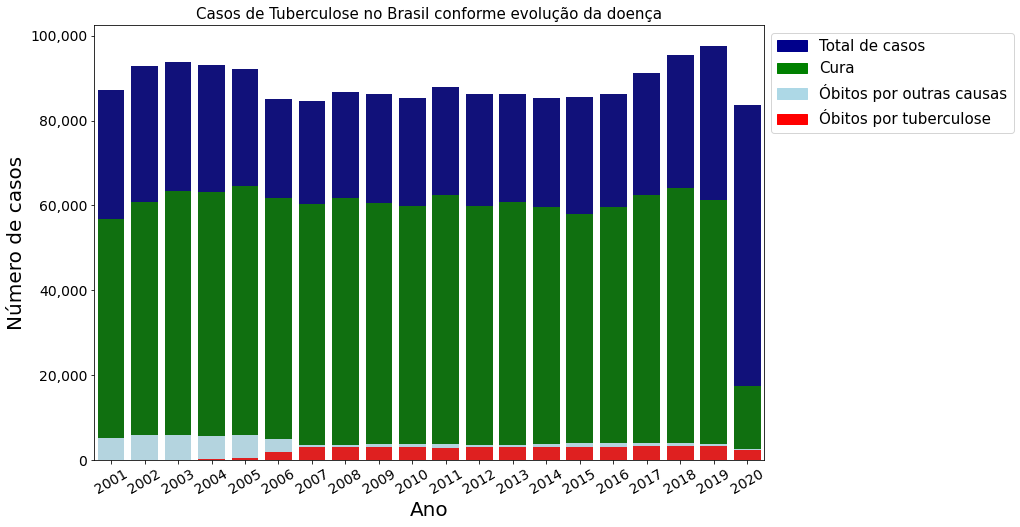

In [44]:
plt.figure(figsize = (12, 8))
plt.title("Casos de Tuberculose no Brasil conforme evolução da doença", fontsize = 15)
bar1 = sns.barplot(data = tub_ano, x = tub_ano.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = tub_ano, x = tub_ano.index, y = "Cura", color = "green")
bar3 = sns.barplot(data = tub_ano, x = tub_ano.index, y = "Óbito por outras causas", color = "lightblue")
bar4 = sns.barplot(data = tub_ano, x = tub_ano.index, y = "Óbito por tuberculose", color = "red")
plt.ylabel("Número de casos", fontsize = 20)
plt.xlabel("Ano", fontsize = 20)
bar1.tick_params(axis = "both", which = "major", labelsize = 14)
bar1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation = 30)

# legenda
b1 = mpatches.Patch(color = "darkblue", label = "Total de casos")
b2 = mpatches.Patch(color = "green", label = "Cura")
b3 = mpatches.Patch(color = "lightblue", label = "Óbitos por outras causas")
b4 = mpatches.Patch(color = "red", label = "Óbitos por tuberculose")
plt.legend(handles = [b1,b2,b3,b4], bbox_to_anchor = (1,1), fontsize = 15)

plt.show()

Evolução da doença por faixa etária

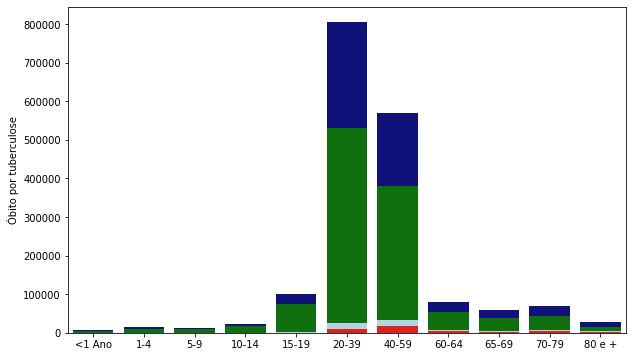

In [7]:
plt.figure(figsize = (10,6))
bar1 = sns.barplot(data = tub_eta, x = tub_eta.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = tub_eta, x = tub_eta.index, y = "Cura", color = "green")
bar3 = sns.barplot(data = tub_eta, x = tub_eta.index, y = "Óbito por outras causas", color = "lightblue")
bar4 = sns.barplot(data = tub_eta, x = tub_eta.index, y = "Óbito por tuberculose", color = "red")

plt.show()

Associação com aplicação da BCG

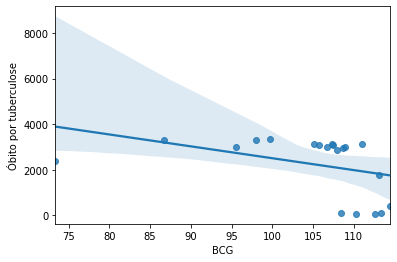

In [8]:
sns.regplot(x = cob_ano.loc[:,"BCG"][7:], y = tub_ano.loc[:, "Óbito por tuberculose"])
#sns.regplot(x = cob_ano.loc[:,"BCG"][7:], y = tub_ano.loc[:, "Total"])
plt.show()

Coqueluche

Evolução da doença ao longo dos anos

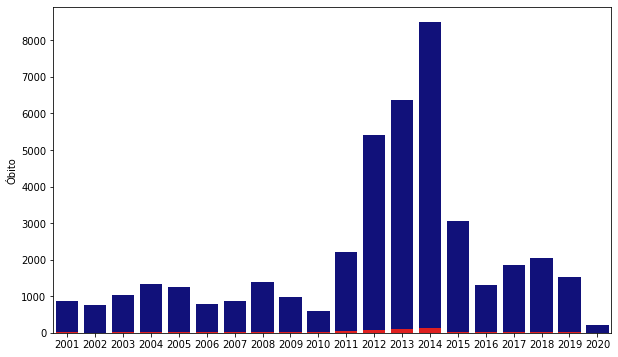

In [12]:
plt.figure(figsize = (10,6))
bar1 = sns.barplot(data = coq_ano, x = coq_ano.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = coq_ano, x = coq_ano.index, y = "Óbito", color = "red")

plt.show()

Evolução por faixa etária

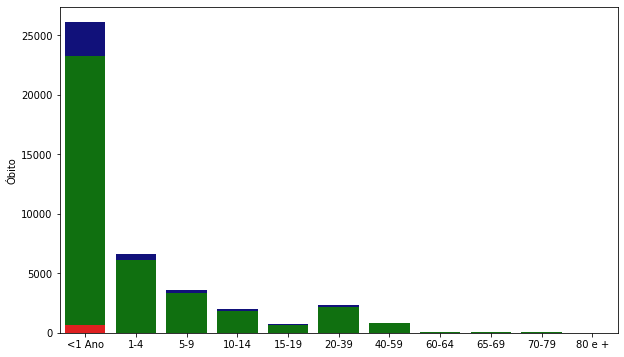

In [14]:
plt.figure(figsize = (10,6))
bar1 = sns.barplot(data = coq_eta, x = coq_eta.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = coq_eta, x = coq_eta.index, y = "Cura", color = "green")
bar3 = sns.barplot(data = coq_eta, x = coq_eta.index, y = "Óbito", color = "red")

plt.show()

Aplicação das vacinas

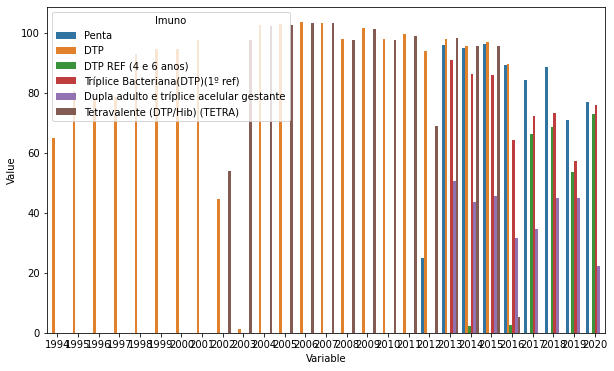

In [16]:
vacs = ["Penta", "DTP", "DTP REF (4 e 6 anos)","Tríplice Bacteriana(DTP)(1º ref)", "Dupla adulto e tríplice acelular gestante", "Tetravalente (DTP/Hib) (TETRA)"]
vacs = cob_im_ano.query("Imuno in @vacs").melt(id_vars = "Imuno").rename(columns = str.title)
plt.figure(figsize = (10,6))
sns.barplot(data = vacs, x = "Variable", y = "Value", hue = "Imuno")
plt.show()

Relação linear não daria pra fazer, teria que ser modelo multivariado - hipótese

Tetano

Evolução da doença ao longo dos anos

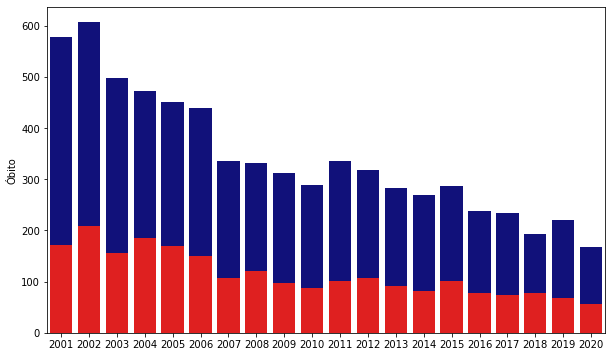

In [9]:
plt.figure(figsize = (10,6))
bar1 = sns.barplot(data = tet_ano, x = tet_ano.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = tet_ano, x = tet_ano.index, y = "Óbito", color = "red")

plt.show()

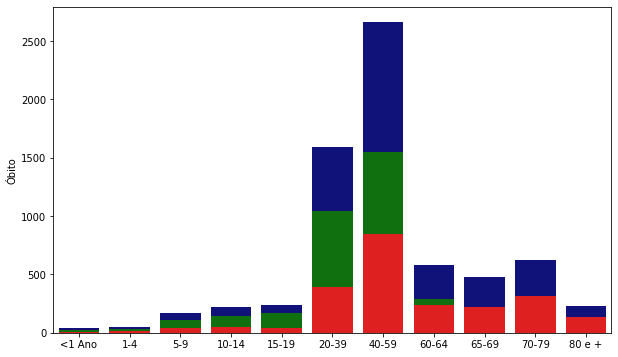

In [15]:
plt.figure(figsize = (10,6))
bar1 = sns.barplot(data = tet_eta, x = tet_eta.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = tet_eta, x = tet_eta.index, y = "Cura", color = "green")
bar4 = sns.barplot(data = tet_eta, x = tet_eta.index, y = "Óbito", color = "red")

plt.show()

Aplicação das vacinas

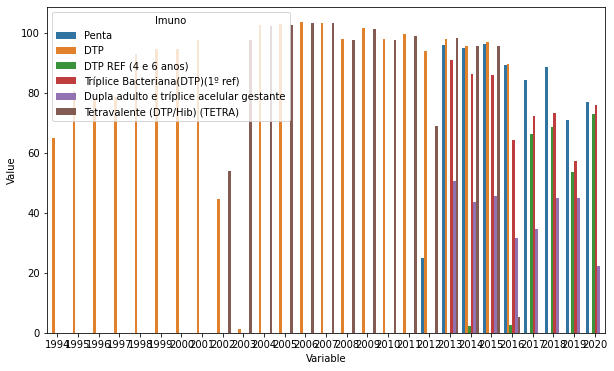

In [17]:
vacs = ["Penta", "DTP", "DTP REF (4 e 6 anos)","Tríplice Bacteriana(DTP)(1º ref)", "Dupla adulto e tríplice acelular gestante", "Tetravalente (DTP/Hib) (TETRA)"]
vacs = cob_im_ano.query("Imuno in @vacs").melt(id_vars = "Imuno").rename(columns = str.title)
plt.figure(figsize = (10,6))
sns.barplot(data = vacs, x = "Variable", y = "Value", hue = "Imuno")
plt.show()

Correlação linear

In [10]:
cob_ano.loc[:,"DTP"][7:23]
tet_ano.loc[:, "Total"][:16]

2001    579.0
2002    607.0
2003    498.0
2004    472.0
2005    451.0
2006    439.0
2007    335.0
2008    331.0
2009    312.0
2010    288.0
2011    335.0
2012    318.0
2013    283.0
2014    270.0
2015    286.0
2016    238.0
Name: Total, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


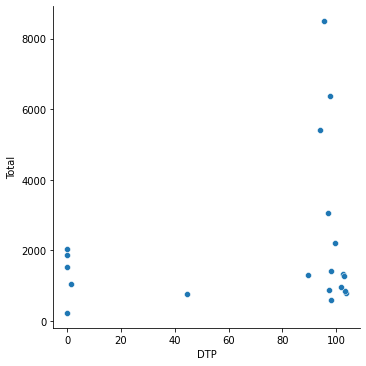

In [11]:
sns.relplot(cob_ano.loc[:,"DTP"], coq_ano.loc[:, "Total"])

# Doencas respiratórias
## Tuberculose
- fazer gráfico da evolução da doença com numero de casos totais e óbitos como barras empilhadas
- A vacinação está sendo efetiva? fazer gráfico da BCG ao longo do tempo
- veremos que é sempre alta, então está imunizando os pequenos?
- fazer gráfico do total de casos e mortalidade como barras empilhadas em função da faixa etária
- vemos que a mortalidade é maior em adultos


- se sobrar tempo, fazer relplot da dose x obito / dose x total

## Coqueluche
- fazer gráfico da evolução da doença (totais e mortes como barras empilhadas ao longo do tempo)
- grafico das 3 vacinas ao longo do tempo, atinge a imunidade de interesse?
- ok, as crianças estão protegidas?
- fazer mortalidade em barras por faixa etaria
- vemos que a mortalidade é maior em crianças, mas mostrar estudos que os adultos é que transmitem mais, reforçar a possibilidade de haver uma segunda dose


- se sobrar tempo, fazer relplot dose X obito

# Tetano
- fazer gráfico da evolução de casos e mortes em barras empilhadas por ano
- olhar pra vacinação com o gráfico anterior, atinge a imunidade de interesse?
- crianças cobertas
- fazer gráfico de morte e total por faixa etaria com barras empilhadas
- ver que a mortalidade também é um pouco maior em adolescentes

- se sobrar tempo, relplot

### Difteria --- assim, só se sobrar muuuuuito tempo

# Conclusões

# Referências